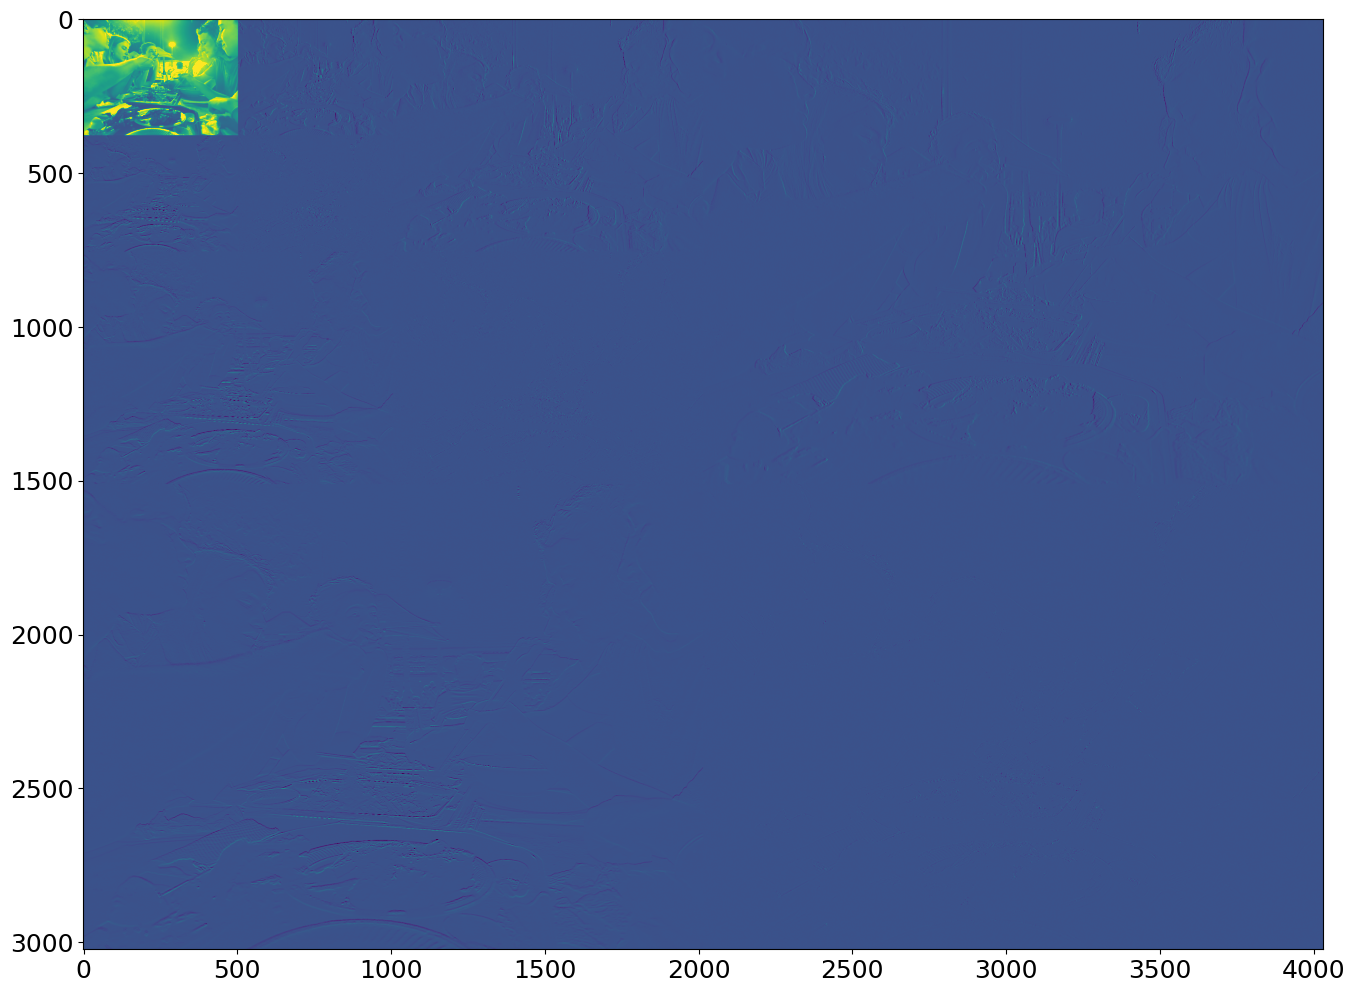

In [7]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import pywt
plt.rcParams['figure.figsize'] = [16,16]
plt.rcParams.update({'font.size': 18})

A = imread('spring_break.jpeg')
B = np.mean(A,-1)

n = 3
w = 'db1'
coef = pywt.wavedec2(B,wavelet=w, level=n)

coef[0] /= np.abs(coef[0]).max()
for level in range(n):
  coef[level + 1] = [d/np.abs(d).max() for d in coef[level + 1]]

arr, coef_slices = pywt.coeffs_to_array(coef)

plt.imshow(arr, vmin=-0.25, vmax=0.75)
plt.show()

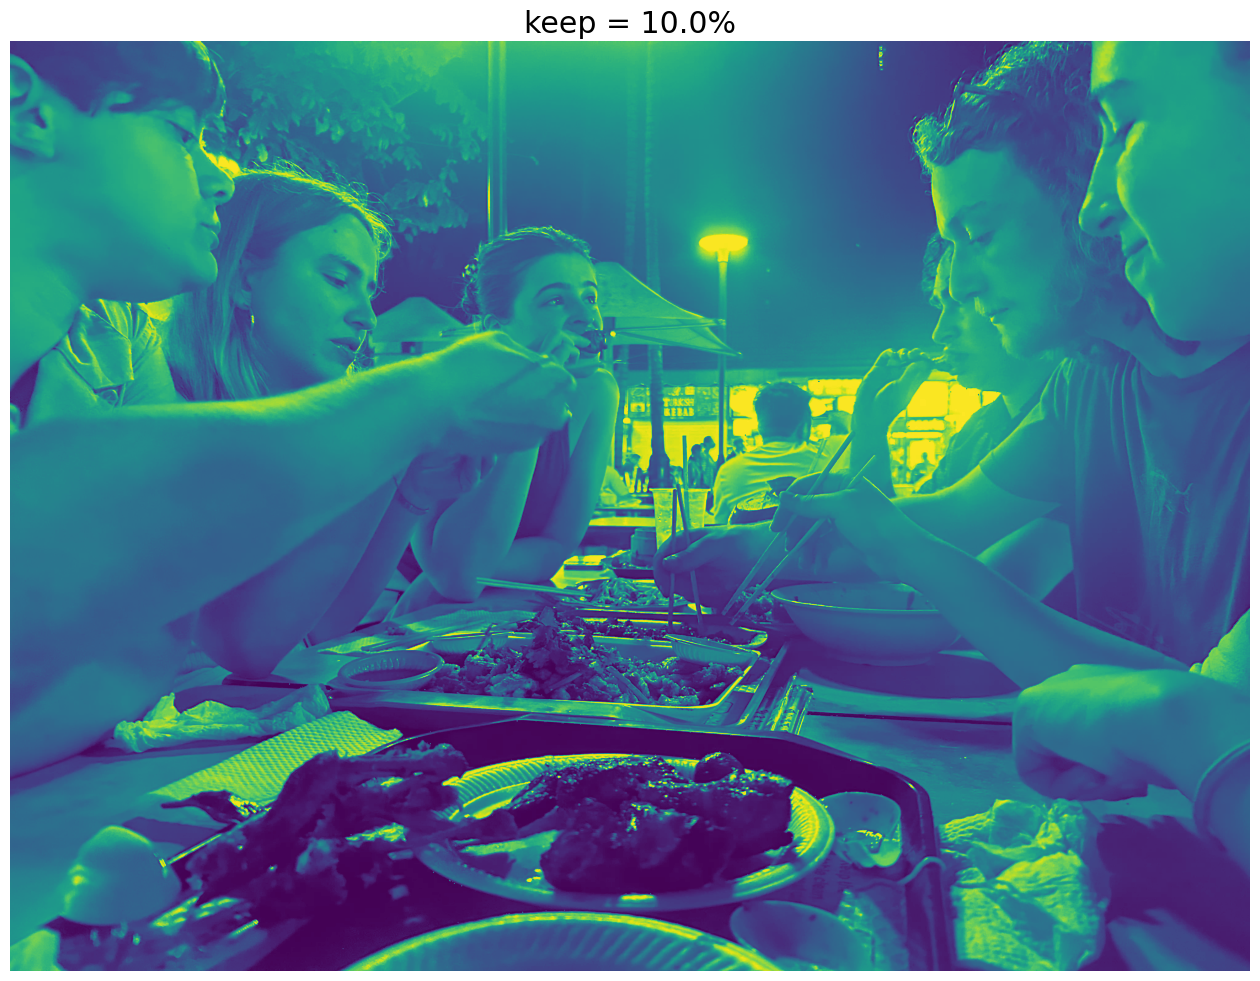

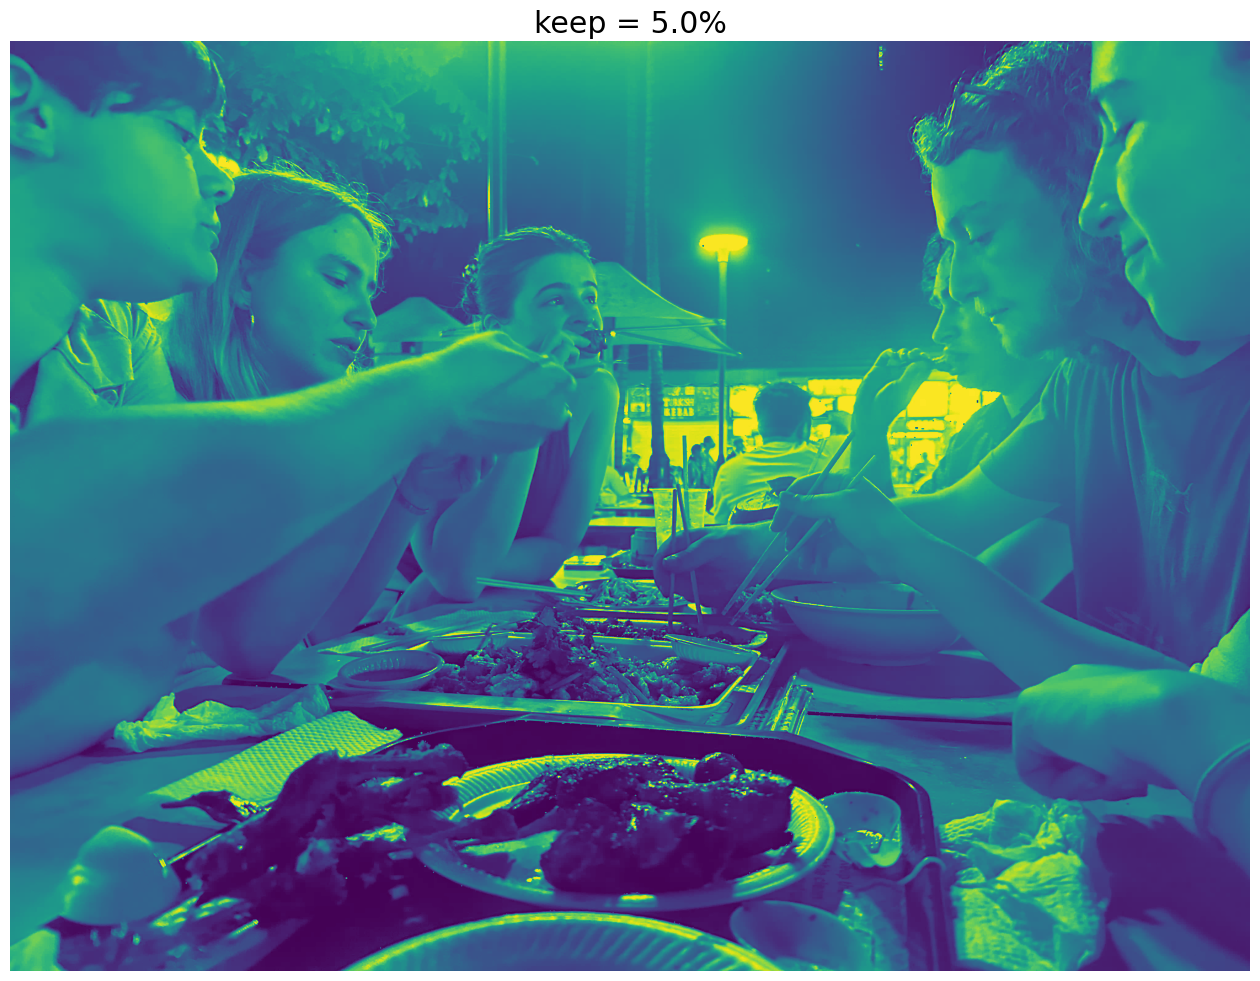

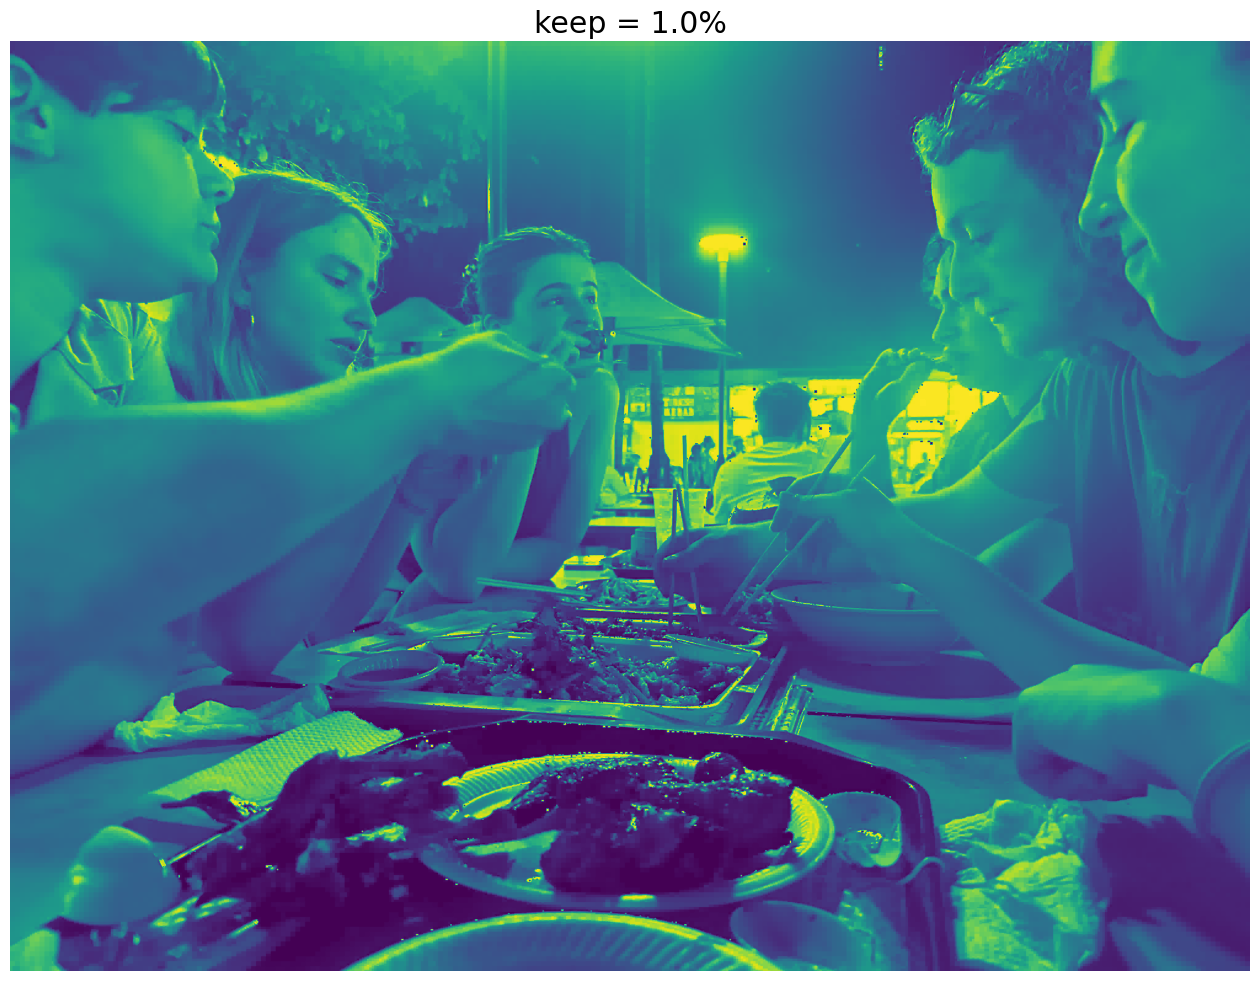

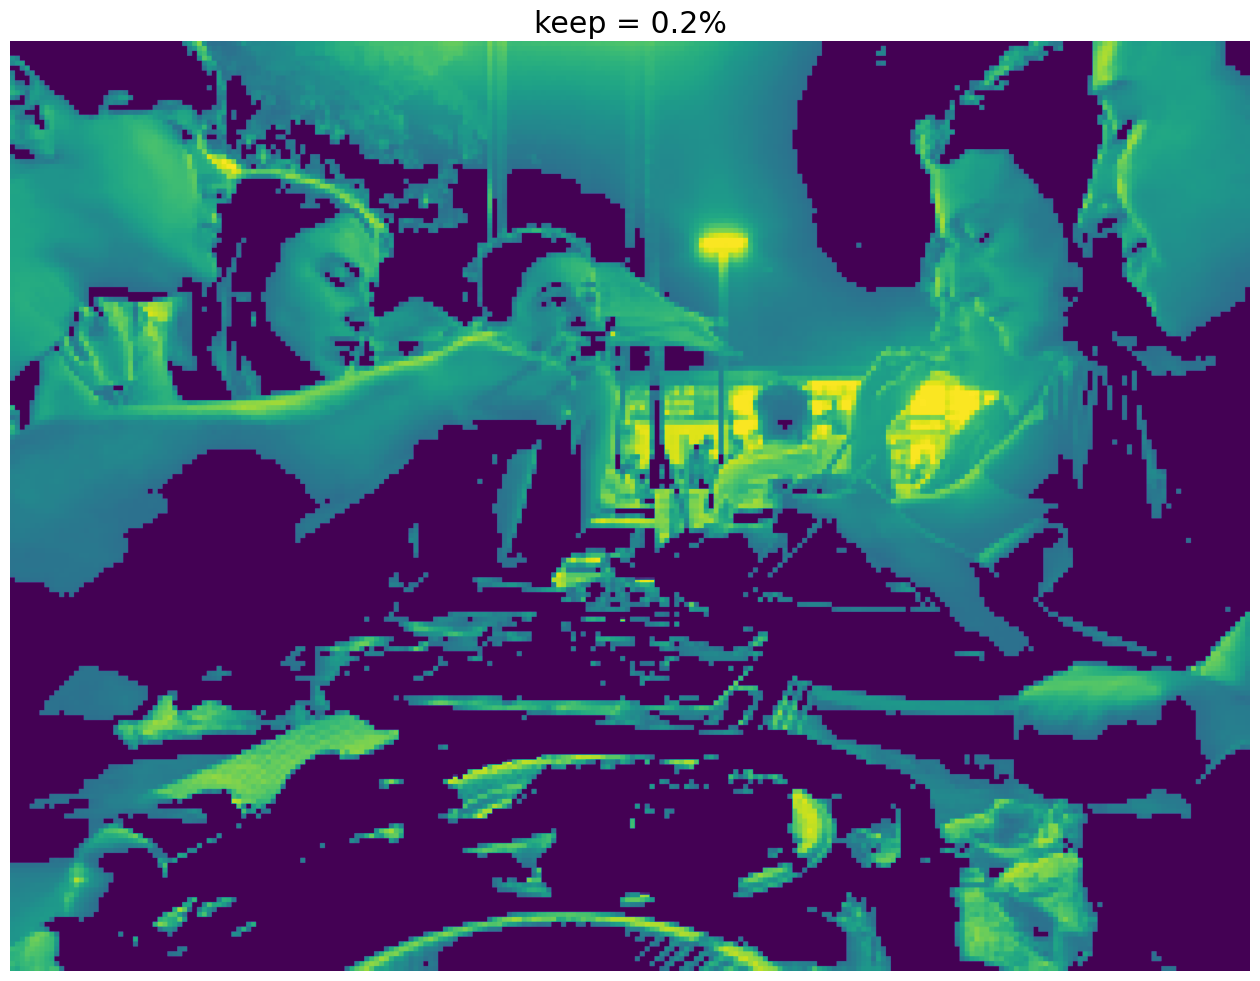

In [9]:
n = 4

coef = pywt.wavedec2(B,wavelet=w, level=n)
arr, coef_slices = pywt.coeffs_to_array(coef)

c_sort = np.sort(np.abs(arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.002):
  threshold = c_sort[int(np.floor((1-keep)*len(c_sort)))]
  index = np.abs(arr) > threshold
  c_filt = arr * index

  coeffs_filt = pywt.array_to_coeffs(c_filt,coef_slices,output_format='wavedec2')

  A = pywt.waverec2(coeffs_filt, wavelet=w)
  plt.figure()
  plt.imshow(A.astype('uint8'))
  plt.axis('off')
  plt.title('keep = ' + str(keep * 100) + "%")